In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time

from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Combine lists
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(61.291516854739484, 59.64875929293996),
 (63.33629450576893, 87.27548171759531),
 (-50.94301170001538, -69.89503479605865),
 (80.7119248011582, 21.37189346985619),
 (-70.8176251085502, 150.50543558903001),
 (-73.60900887784442, 3.8159718733822956),
 (-14.948163137983215, -171.97502520840953),
 (-53.23089505915793, 54.126970249029426),
 (-20.52044727420615, -117.71389274362792),
 (6.490753079383268, -45.06909992516276),
 (-22.302163100578227, 134.34381415041747),
 (-20.869865384840395, -101.2359033454428),
 (8.059162386442466, 56.96712707724919),
 (42.68509637453448, -42.822979038512585),
 (-56.22242693738702, 106.86614581439119),
 (50.854918979345626, -31.365943139469834),
 (-45.4926734299874, 122.32112824556509),
 (78.8190097563533, -30.378349039796802),
 (52.32901963348439, -38.512164043223265),
 (-32.0235769280602, 126.47000025861945),
 (58.17149980087976, -51.11323333460231),
 (-75.90010203899246, 17.539884025570103),
 (2.510674733164592, -74.8684243710795),
 (-43.96670695265172,

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | polunochnoye
Processing Record 2 of Set 1 | turukhansk
Processing Record 3 of Set 1 | rio gallegos
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | saleilua
City not found. Skipping...
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | saint-georges
Processing Record 11 of Set 1 | alice springs
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | torbay
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | nanortalik
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | paamiut
Processing Re

Processing Record 38 of Set 4 | hasaki
Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 4 | caravelas
Processing Record 41 of Set 4 | conde
Processing Record 42 of Set 4 | pedernales
Processing Record 43 of Set 4 | northam
Processing Record 44 of Set 4 | greenville
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | zyryanka
Processing Record 47 of Set 4 | high prairie
Processing Record 48 of Set 4 | victorville
Processing Record 49 of Set 4 | karaul
City not found. Skipping...
Processing Record 50 of Set 4 | yaviza
Processing Record 1 of Set 5 | buala
Processing Record 2 of Set 5 | bilibino
Processing Record 3 of Set 5 | dikson
Processing Record 4 of Set 5 | ntungamo
Processing Record 5 of Set 5 | labutta
City not found. Skipping...
Processing Record 6 of Set 5 | amazar
Processing Record 7 of Set 5 | norman wells
Processing Record 8 of Set 5 | christchurch
Processing Record 9 of Set 5 | ixtapa
Processi

Processing Record 28 of Set 8 | sestri levante
Processing Record 29 of Set 8 | progreso
Processing Record 30 of Set 8 | nantucket
Processing Record 31 of Set 8 | shostka
Processing Record 32 of Set 8 | nuuk
Processing Record 33 of Set 8 | atambua
Processing Record 34 of Set 8 | port hedland
Processing Record 35 of Set 8 | kemijarvi
Processing Record 36 of Set 8 | de-kastri
Processing Record 37 of Set 8 | zhigansk
Processing Record 38 of Set 8 | solnechnyy
Processing Record 39 of Set 8 | zhezkazgan
Processing Record 40 of Set 8 | cedar city
Processing Record 41 of Set 8 | chirawa
Processing Record 42 of Set 8 | kuusamo
Processing Record 43 of Set 8 | bor
Processing Record 44 of Set 8 | bridgton
Processing Record 45 of Set 8 | rodnykove
Processing Record 46 of Set 8 | dharchula
Processing Record 47 of Set 8 | impfondo
Processing Record 48 of Set 8 | ejido
Processing Record 49 of Set 8 | salinopolis
Processing Record 50 of Set 8 | parrita
Processing Record 1 of Set 9 | tawkar
City not fou

Processing Record 16 of Set 12 | nabire
Processing Record 17 of Set 12 | jiayuguan
Processing Record 18 of Set 12 | bowen
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | sioux lookout
Processing Record 21 of Set 12 | loreto
Processing Record 22 of Set 12 | canyon
Processing Record 23 of Set 12 | shelburne
Processing Record 24 of Set 12 | tommot
Processing Record 25 of Set 12 | camana
Processing Record 26 of Set 12 | manicore
Processing Record 27 of Set 12 | andenes
Processing Record 28 of Set 12 | awbari
Processing Record 29 of Set 12 | ostrovnoy
Processing Record 30 of Set 12 | kushiro
Processing Record 31 of Set 12 | bang krathum
Processing Record 32 of Set 12 | shihezi
Processing Record 33 of Set 12 | kiama
Processing Record 34 of Set 12 | okara
Processing Record 35 of Set 12 | along
Processing Record 36 of Set 12 | zemio
Processing Record 37 of Set 12 | kitimat
Processing Record 38 of Set 12 | kruisfontein
Processing Record 39 of Set 12 | tabou
Processing

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Polunochnoye,60.87,60.42,37.22,93,96,6.53,RU,2020-10-19 16:32:22
1,Turukhansk,65.82,87.98,12.20,97,99,3.76,RU,2020-10-19 16:32:22
2,Rio Gallegos,-51.62,-69.22,50.00,31,75,39.15,AR,2020-10-19 16:32:23
3,Longyearbyen,78.22,15.64,26.60,79,75,6.93,SJ,2020-10-19 16:32:23
4,Hobart,-42.88,147.33,46.40,93,39,3.36,AU,2020-10-19 16:31:25
5,Hermanus,-34.42,19.23,61.00,69,70,4.00,ZA,2020-10-19 16:32:23
6,Rikitea,-23.12,-134.97,73.63,79,0,14.79,PF,2020-10-19 16:32:24
7,Saint-Georges,12.06,-61.75,87.80,70,20,17.22,GD,2020-10-19 16:32:24
8,Alice Springs,-23.70,133.88,68.00,72,28,6.93,AU,2020-10-19 16:31:27
9,Puerto Ayora,-0.74,-90.35,77.00,69,75,9.17,EC,2020-10-19 16:32:24


In [7]:
# Rearrange columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Polunochnoye,RU,2020-10-19 16:32:22,60.87,60.42,37.22,93,96,6.53
1,Turukhansk,RU,2020-10-19 16:32:22,65.82,87.98,12.20,97,99,3.76
2,Rio Gallegos,AR,2020-10-19 16:32:23,-51.62,-69.22,50.00,31,75,39.15
3,Longyearbyen,SJ,2020-10-19 16:32:23,78.22,15.64,26.60,79,75,6.93
4,Hobart,AU,2020-10-19 16:31:25,-42.88,147.33,46.40,93,39,3.36
5,Hermanus,ZA,2020-10-19 16:32:23,-34.42,19.23,61.00,69,70,4.00
6,Rikitea,PF,2020-10-19 16:32:24,-23.12,-134.97,73.63,79,0,14.79
7,Saint-Georges,GD,2020-10-19 16:32:24,12.06,-61.75,87.80,70,20,17.22
8,Alice Springs,AU,2020-10-19 16:31:27,-23.70,133.88,68.00,72,28,6.93
9,Puerto Ayora,EC,2020-10-19 16:32:24,-0.74,-90.35,77.00,69,75,9.17


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

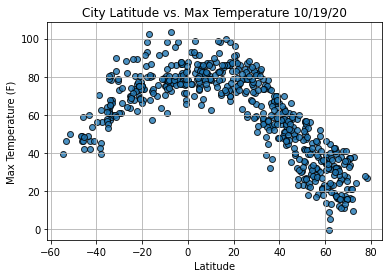

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

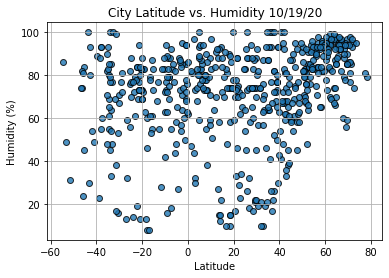

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

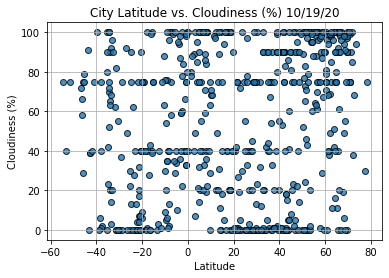

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

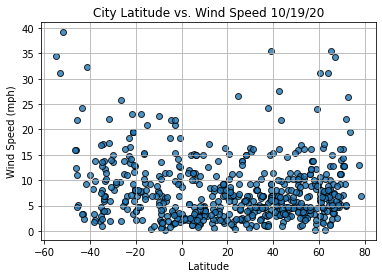

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()